# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [14]:

# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import geoviews as gv
import geoviews.feature as gf

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv")

# Display sample data
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6872,128.8694,-26.63,100,96,1.54,RU,1706917606
1,1,college,64.8569,-147.8028,-31.22,70,75,0.00,US,1706917601
2,2,faya-largeau,17.9257,19.1043,14.00,22,2,9.42,TD,1706917639
3,3,bredasdorp,-34.5322,20.0403,20.83,95,27,1.86,ZA,1706917639
4,4,sitka,57.0531,-135.3300,0.94,60,100,4.12,US,1706917479
...,...,...,...,...,...,...,...,...,...,...
551,551,hovd,48.0056,91.6419,-20.16,95,100,0.68,MN,1706917769
552,552,akureyri,65.6835,-18.0878,-3.04,80,100,7.72,IS,1706917770
553,553,lubang,13.8584,120.1240,25.66,80,6,9.73,PH,1706917770
554,554,jiwani,25.0500,61.7417,23.83,90,92,6.58,PK,1706917771


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

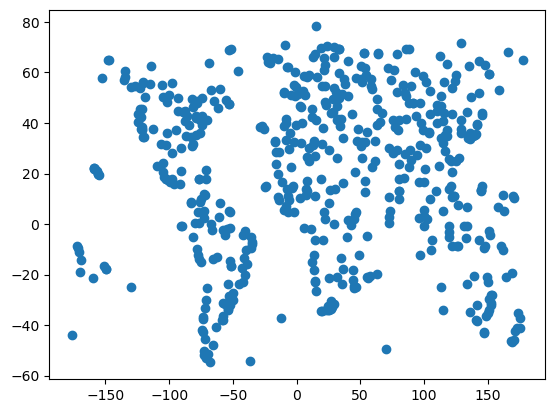

In [3]:
%%capture --no-display

# Configure the map plot
plt.scatter(city_data_df['Lng'], city_data_df['Lat'])


# Display the map
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
sunny_days = city_data_df[city_data_df['Cloudiness'] == 0]
# sunny_days

# Drop any rows with null values
df = sunny_days.dropna()

# Display sample data
df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,6,iqaluit,63.7506,-68.5145,-26.15,70,0,5.14,CA,1706917639
18,18,ardakan,32.3100,54.0175,3.60,53,0,0.69,IR,1706917642
45,45,pisco,-13.7000,-76.2167,25.03,73,0,10.80,PE,1706917590
53,53,cidreira,-30.1811,-50.2056,23.35,75,0,8.01,BR,1706917650
67,67,murwara,23.8500,80.4000,13.66,69,0,1.68,IN,1706917654
95,95,kuusamo,65.9667,29.1833,-7.98,93,0,3.09,FI,1706917660
106,106,inverell,-29.7833,151.1167,33.15,50,0,2.68,AU,1706917662
111,111,codrington,-38.2667,141.9667,22.34,32,0,3.29,AU,1706917664
112,112,bouarfa,32.5300,-1.9500,7.34,39,0,2.70,MA,1706917664
130,130,hamilton,39.1834,-84.5333,6.91,72,0,5.66,US,1706917597


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = sunny_days.copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ''

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
6,6,iqaluit,63.7506,-68.5145,-26.15,70,0,5.14,CA,1706917639,
18,18,ardakan,32.3100,54.0175,3.60,53,0,0.69,IR,1706917642,
45,45,pisco,-13.7000,-76.2167,25.03,73,0,10.80,PE,1706917590,
53,53,cidreira,-30.1811,-50.2056,23.35,75,0,8.01,BR,1706917650,
67,67,murwara,23.8500,80.4000,13.66,69,0,1.68,IN,1706917654,
95,95,kuusamo,65.9667,29.1833,-7.98,93,0,3.09,FI,1706917660,
106,106,inverell,-29.7833,151.1167,33.15,50,0,2.68,AU,1706917662,
111,111,codrington,-38.2667,141.9667,22.34,32,0,3.29,AU,1706917664,
112,112,bouarfa,32.5300,-1.9500,7.34,39,0,2.70,MA,1706917664,
130,130,hamilton,39.1834,-84.5333,6.91,72,0,5.66,US,1706917597,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [11]:
# Set parameters to search for a hotel
radius = 10000
params = {
    "categories": "accommodation.hotel",
    "apiKey": geoapify_key,
    "limit": 20
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index,row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lng},{lat},{radius}"
    params["bias"] = f"proximity:{lng},{lat}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionary
    name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
iqaluit - nearest hotel: Frobisher Inn
ardakan - nearest hotel: هتل رستوران باغ سرای اردکان
pisco - nearest hotel: La Portada
cidreira - nearest hotel: Hotel Castelo
murwara - nearest hotel: No hotel found
kuusamo - nearest hotel: Holiday Club Kuusamon Tropiikki
inverell - nearest hotel: Oxford Hotel
codrington - nearest hotel: No hotel found
bouarfa - nearest hotel: Climat du Maroc مناخ المغرب
hamilton - nearest hotel: North Vista Manor
illizi - nearest hotel: بوناقة
la ronge - nearest hotel: La Ronge Hotel and Suites
ibiruba - nearest hotel: Eurotel
sabha - nearest hotel: فندق الكاظم-سبها
mount gambier - nearest hotel: The Old Mount Gambier Gaol
anderson - nearest hotel: La Quinta
victoria de durango - nearest hotel: Buenos Aires
nova sintra - nearest hotel: Residência Ka Dencho
petropavlovsk-kamchatsky - nearest hotel: ООО Постоялый двор
tura - nearest hotel: No hotel found
port lincoln - nearest hotel: Boston Hotel
san luis de la loma - nearest hotel: No hotel

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
6,6,iqaluit,63.7506,-68.5145,-26.15,70,0,5.14,CA,1706917639,Frobisher Inn
18,18,ardakan,32.3100,54.0175,3.60,53,0,0.69,IR,1706917642,هتل رستوران باغ سرای اردکان
45,45,pisco,-13.7000,-76.2167,25.03,73,0,10.80,PE,1706917590,La Portada
53,53,cidreira,-30.1811,-50.2056,23.35,75,0,8.01,BR,1706917650,Hotel Castelo
67,67,murwara,23.8500,80.4000,13.66,69,0,1.68,IN,1706917654,No hotel found
95,95,kuusamo,65.9667,29.1833,-7.98,93,0,3.09,FI,1706917660,Holiday Club Kuusamon Tropiikki
106,106,inverell,-29.7833,151.1167,33.15,50,0,2.68,AU,1706917662,Oxford Hotel
111,111,codrington,-38.2667,141.9667,22.34,32,0,3.29,AU,1706917664,No hotel found
112,112,bouarfa,32.5300,-1.9500,7.34,39,0,2.70,MA,1706917664,Climat du Maroc مناخ المغرب
130,130,hamilton,39.1834,-84.5333,6.91,72,0,5.66,US,1706917597,North Vista Manor


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

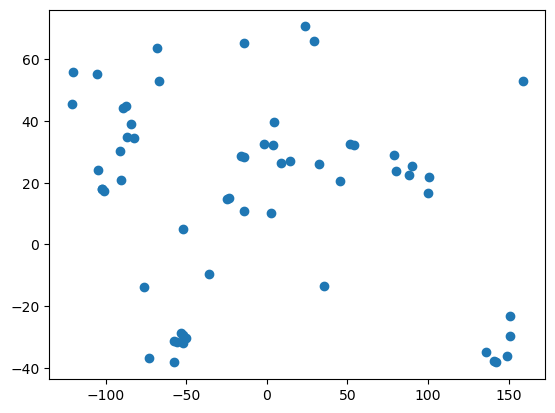

In [18]:
%%capture --no-display

# Configure the map plot
plt.scatter(hotel_df['Lng'], hotel_df['Lat'])


# Display the map
plt.show()